<a href="https://colab.research.google.com/github/Cinefirm/CineFirmV3/blob/main/Detecting_Vulnerable_Smart_Contracts_Using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Install Python libraries**

In [ ]:
pip install pandas numpy scikit-learn matplotlib seaborn tensorflow

### **Import essential libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


### **Load and Preprocess the Data**

In [ ]:
data = pd.read_csv('BCCC-VulSCs-2023.csv')

### ****Explore the data

In [ ]:
print(data.head())
print(data.info())
print(data.describe())

   Unnamed: 0                                            hash_id  label  \
0           1  1a7db6c3aef23051792d765423481dc3834b0f0c040e53...      1   
1           2  4e9baf6ce5fefc2319ca9f0341d2010aba2656a711bb0f...      1   
2         117  0bcfd16036ac413245cc434a20759fece5c9d9d2fa1d98...      1   
3         120  cfedeb2b900d9ec4e89b883596b886faf3ef6e704f9bf9...      1   
4         193  fb0229a1a174a0f867806ea69812a37476360acef1e8cb...      1   

   bytecode_len  Weight bytecode_character_6  Weight bytecode_character_0  \
0             0                     0.000000                     0.000000   
1             0                     0.000000                     0.000000   
2          8370                     0.059498                     0.151732   
3          2586                     0.069606                     0.176334   
4          7002                     0.068695                     0.184090   

   Weight bytecode_character_8  Weight bytecode_character_4  \
0                     0

### **Preprocess**

In [ ]:
data = data.drop(columns=['raw_source_code', 'hashed_source_code'], errors='ignore')
data.fillna(0, inplace=True)

In [ ]:
X = X.drop(columns=['hash_id', 'Unnamed: 0'], errors='ignore')  # Drop any irrelevant columns

### **Split features and labels**

In [ ]:
X = data.drop(columns=['label'])  # Drop the binary label column
y = data['label']  # Target variable

### **Normalize numerical data**

In [ ]:
print(X.dtypes)

Unnamed: 0                       int64
hash_id                         object
bytecode_len                     int64
Weight bytecode_character_6    float64
Weight bytecode_character_0    float64
                                ...   
Weight bytecode_character_m    float64
bytecode_character_I           float64
bytecode_character_m           float64
Weight bytecode_character_x    float64
bytecode_character_x           float64
Length: 267, dtype: object


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select only numeric columns
X_numeric = X.select_dtypes(include=['float64', 'int64'])

# Initialize the scaler
scaler = StandardScaler()

# Scale the numeric data
X_scaled = scaler.fit_transform(X_numeric)

# Convert the scaled data back to a DataFrame if needed
X_scaled_df = pd.DataFrame(X_scaled, columns=X_numeric.columns)

# Output the first few rows to verify
print(X_scaled_df.head())

   Unnamed: 0  bytecode_len  Weight bytecode_character_6  \
0   -6.475201     -0.732585                    -1.925628   
1   -6.474990     -0.732585                    -1.925628   
2   -6.450660      0.397206                    -0.008180   
3   -6.450025     -0.383524                     0.317550   
4   -6.434581      0.212552                     0.288194   

   Weight bytecode_character_0  Weight bytecode_character_8  \
0                    -1.709239                    -1.769474   
1                    -1.709239                    -1.769474   
2                    -0.332841                    -0.189202   
3                    -0.109673                    -0.165823   
4                    -0.039315                     0.337743   

   Weight bytecode_character_4  Weight bytecode_character_5  \
0                    -1.523577                    -1.854181   
1                    -1.523577                    -1.854181   
2                    -0.516900                    -0.060606   
3       

### **Split the Dataset**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


### **Training a Baseline Model**

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### **Evaluate the Model**

In [ ]:
y_pred = model.predict(X_test) #Make predictions

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1952

    accuracy                           1.00      1952
   macro avg       1.00      1.00      1.00      1952
weighted avg       1.00      1.00      1.00      1952

Confusion Matrix:
 [[1952]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


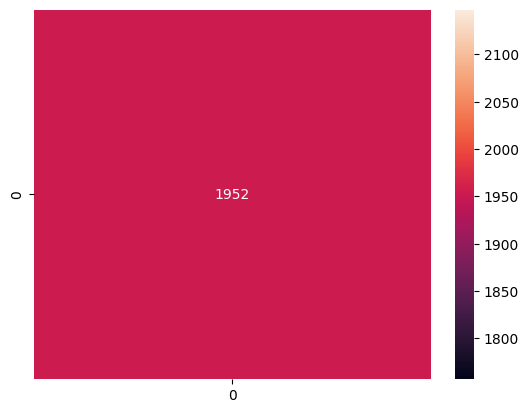

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

### Optimize the Model

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


### **Retrain with optimal parameters:**

In [ ]:
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)

print("Optimized Accuracy:", accuracy_score(y_test, y_pred_optimized))

Optimized Accuracy: 1.0
